In [26]:
# dataset_names = ["imagenet-a", "imagenet-o","imagenet-r", "cifar100", "caltech101", "cars", "aircraft", "country211", "fer2013", "food101", "imagenetv2", "pets", "sun397"]
dataset_names = ["imagenet-a", "imagenet-o","imagenet-r", "cifar100", "caltech101", "cars", "aircraft", "country211", "fer2013", "food101", "imagenetv2", "pets", "sun397"]

splits = ["train", "test"]

for dataset_name in dataset_names:
    for split in splits:
        list_fp(f"{dataset_name}-{split}")

imagenet-a-train combined results not found, skipping.
processing imagenet-a-test
list saved:  /teamspace/studios/this_studio/fp_figures/lists
imagenet-o-train combined results not found, skipping.
processing imagenet-o-test
list saved:  /teamspace/studios/this_studio/fp_figures/lists
imagenet-r-train combined results not found, skipping.
processing imagenet-r-test
list saved:  /teamspace/studios/this_studio/fp_figures/lists
processing cifar100-train
list saved:  /teamspace/studios/this_studio/fp_figures/lists
processing cifar100-test
list saved:  /teamspace/studios/this_studio/fp_figures/lists
processing caltech101-train
list saved:  /teamspace/studios/this_studio/fp_figures/lists
processing caltech101-test
list saved:  /teamspace/studios/this_studio/fp_figures/lists
processing cars-train
list saved:  /teamspace/studios/this_studio/fp_figures/lists
processing cars-test
list saved:  /teamspace/studios/this_studio/fp_figures/lists
processing aircraft-train
list saved:  /teamspace/studio

processing fer2013-test
list saved:  /teamspace/studios/this_studio/fp_figures/lists
processing food101-train
list saved:  /teamspace/studios/this_studio/fp_figures/lists
processing food101-test
list saved:  /teamspace/studios/this_studio/fp_figures/lists
imagenetv2-train combined results not found, skipping.
processing imagenetv2-test
list saved:  /teamspace/studios/this_studio/fp_figures/lists
processing pets-train
list saved:  /teamspace/studios/this_studio/fp_figures/lists
processing pets-test
list saved:  /teamspace/studios/this_studio/fp_figures/lists
sun397-train combined results not found, skipping.
processing sun397-test
list saved:  /teamspace/studios/this_studio/fp_figures/lists


In [25]:
import os
import json
import tqdm
def list_fp(dataset_name, threshold=4):
    input_dir_raw = f"/teamspace/studios/find-overlaps-in-laion-400m/data/intermediate/{dataset_name}/match_indices_{threshold}"
    if not os.path.exists(input_dir_raw):
        input_dir_raw = f"/teamspace/studios/this_studio/data/intermediate/{dataset_name}/match_indices_{threshold}"
    input_file_raw = os.path.join(input_dir_raw, "combined_results.json")
    input_file_final = f"/teamspace/studios/this_studio/data/final/{dataset_name}/final_results.json"
    try:
        with open(input_file_raw, "r") as f:
            results_raw = json.load(f)
            # print(results_raw)
    except FileNotFoundError:
        print(f"{dataset_name} combined results not found, skipping.")
        return

    try:
        with open(input_file_final, "r") as f:
            results_final = json.load(f)
    except FileNotFoundError:
        print(f"{dataset_name} combined results not found, skipping.")
        return

    print(f"processing {dataset_name}")
    output_dir = f"/teamspace/studios/this_studio/fp_figures/lists"
    os.makedirs(output_dir, exist_ok=True)

    # with open(input_file_raw, "r") as f:
    #     results_raw = json.load(f)
    # with open(input_file_final, "r") as f:
    #     results_final = json.load(f)

    fp = {}
    for uid, indices in results_raw.items():
        if uid not in results_final:
            fp[uid] = indices[:5]
    with open(os.path.join(output_dir, f"{dataset_name}.json"), "w") as f:
        json.dump(fp, f, indent = 6)
    print("list saved: ", output_dir)

# Visualize

In [66]:
from datasets import load_dataset
from torchvision import transforms
import json
"""
Parameters:

- datset_name: also include train/test split

- hf_dataset: the dataset identifier in huggingface;

- optimized_dir: directory to save optimized_dataset;

- image_key: "webp", "jpg" or "png";

- id_key: the id attribute in dataset card, default is "__key__"

- label_key: the text/caption attribute in dataset card, default is "cls" 

- threshold(inclusive): the maximum distance for search results, in hamming distance, how many bits in the hash string is different.

- perceptual hash or average hash

- k: the number of results to show

NOTE: need to provicde classes as a list if labels are numerical ELSE LEFT THE CLASSES LIST EMPTY
"""

dataset_name = "aircraft"
split = "train"
# hf_dataset = load_dataset("clip-benchmark/wds_vtab-food101", split="test", streaming=False)

threshold = 4
method = "perceptual" 

k = 5

"""LEFT CLASSES LIST EMPTY IF NO NEED TO PROVIDE IT"""
classes = json.load(open(f"data/classes_{dataset_name}.json", "r"))
print(len(classes))

100


In [67]:
if dataset_name == "cifar100":
    hf_dataset = load_dataset("clip-benchmark/wds_vtab-cifar100", split=split, streaming=False)
elif dataset_name == "caltech101":
    hf_dataset = load_dataset("clip-benchmark/wds_vtab-caltech101", split=split, streaming=False)
elif dataset_name == "food101":
    hf_dataset = load_dataset("clip-benchmark/wds_food101", split=split, streaming=False)
elif dataset_name == "cars":
    hf_dataset = load_dataset("clip-benchmark/wds_cars", split=split, streaming=False)
elif dataset_name == "country211":
    hf_dataset = load_dataset("clip-benchmark/wds_country211", split=split, streaming=False)
elif dataset_name == "sun397":
    hf_dataset = load_dataset("clip-benchmark/wds_sun397", split=split, streaming=False)
elif dataset_name == "fer2013":
    hf_dataset = load_dataset("clip-benchmark/wds_fer2013", split=split, streaming=False)
elif dataset_name == "aircraft":
    hf_dataset = load_dataset("clip-benchmark/wds_fgvc_aircraft", split=split, streaming=False)
elif dataset_name == "imagenetv2":
    hf_dataset = load_dataset("clip-benchmark/wds_imagenetv2", split=split, streaming=False)
elif dataset_name == "imagenet-o":
    hf_dataset = load_dataset("clip-benchmark/wds_imagenet-o", split=split, streaming=False)
elif dataset_name == "pets":
    hf_dataset = load_dataset("clip-benchmark/wds_vtab-pets", split=split, streaming=False)
elif dataset_name == "imagenet-a":
    hf_dataset = load_dataset("clip-benchmark/wds_imagenet-a", split=split, streaming=False)
elif dataset_name == "imagenet-r":
    hf_dataset = load_dataset("clip-benchmark/wds_imagenet-r", split=split, streaming=False)

if "webp" in hf_dataset[0] and hf_dataset[0]["webp"] is not None:
    image_key = "webp"
elif hf_dataset[0]["jpg"] is not None:
    image_key = "jpg"
    
dataset_name += "-" + split
print(dataset_name)

aircraft-train


# Load dataset from Huggingface

Optimize hf dataset for fast search and retrival.

In [68]:
import os
import json
from pathlib import Path
from PIL import Image
# from lightning.data import StreamingDataset, StreamingDataLoader
# from lightning.data.streaming.serializers import JPEGSerializer

def optimize_hf_to_lightning(hf_dataset, output_dir, image_key="webp", id_key="__key__", label_key="cls"):
    """
    Iterates over the Hugging Face dataset and saves each sample to disk in a format
    that Lightning's StreamingDataset can read. An index file (index.json) is created.
    
    Each sample is stored as:
      - An image file in JPEG format
      - A metadata entry in the index that records the file path and label
    
    Parameters:
      hf_dataset: The Hugging Face dataset (can be streaming or in-memory)
      output_dir: Directory where the optimized dataset will be stored.
      image_key: Field name in the dataset containing image data.
      id_key: Field name to use as a unique identifier.
      label_key: Field name containing label or class information.
    Returns:
      The output directory path (which contains the data and index).
    """

    os.makedirs(output_dir, exist_ok=True)
    index = {}
    # serializer = JPEGSerializer()  # Can be used to serialize images if desired.
    
    # Iterate over the dataset and write each sample.
    for sample in hf_dataset:
        uid = sample[id_key]
        # Define a file path for the image.
        image_filename = f"{uid}.jpeg"
        image_path = os.path.join(output_dir, image_filename)
        
        # Get the image. Depending on your dataset, it might already be a PIL Image.
        image = sample[image_key]
        if not isinstance(image, Image.Image):
            # If image is not a PIL image, try converting it.
            image = Image.fromarray(image)
            
        if image.mode != "RGB":
            image = image.convert("RGB")
        # Save the image in JPEG format.
        image.save(image_path, format="JPEG")
        
        # Record metadata in the index.
        index[uid] = {
            "image_path": image_filename,  # Store relative path
            "label": sample[label_key],
        }
    
    # Write out the index file.
    index_path = os.path.join(output_dir, "index.json")
    with open(index_path, "w") as f:
        json.dump(index, f)
    
    return output_dir

In [69]:
import os
import io
import json
from PIL import Image
import imagehash
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class HFDataset(Dataset):

    def __init__(self, root_dir, index_file, lookup=None, transform=None):
        self.root_dir = root_dir
        with open(os.path.join(root_dir, index_file), "r") as f:
            self.index_data = json.load(f)
        self.lookup = lookup
        self.samples = list(self.index_data.items())
        self.uid_to_sample = dict(self.samples)
        self.transform = transform 


    def __len__(self):
        return len(self.samples)
        
    def __getitem__(self, index):
        uid, sample = self.samples[index]
        image_path = os.path.join(self.root_dir, sample["image_path"])
        pil_image = Image.open(image_path).convert("RGB")
        text = self.lookup[sample["label"]] if self.lookup else sample["label"]

        ahash = str(imagehash.average_hash(pil_image))
        phash = str(imagehash.phash(pil_image))

        return index, text, ahash, phash, uid

    def get_by_id(self, uid):
        """
        Retrieve a raw PIL image and metadata by its unique identifier.
        """
        # if uid not in self.uid_to_sample:
        #     raise KeyError(f"UID: {uid} not found in dataset.")
        sample = self.uid_to_sample[uid]
        image_path = os.path.join(self.root_dir, sample["image_path"])
        pil_image = Image.open(image_path).convert("RGB")
        text = self.lookup[sample["label"]] if self.lookup else sample["label"]
        ahash = imagehash.average_hash(pil_image)
        phash = str(imagehash.phash(pil_image))

        return pil_image, text, ahash, phash

('707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320', '707-320') ('ffffffff00000000', '0000f0bf48f1fef0', 'ffffff7f00000000', '00c0003e3fffffff', 'ffffffff83000000', 'ffff303ec6930000', '003fdeff7f000000', 'fc0102ffff0c48f1', 'ffffffff42000000', 'ff0f047eef000020', 'f8fcfc8080fcfcfc', 'fffe000000c1ffcf', 'ffffffff00000000', 'ffffffbf0000ebff', 'fffffff800000000', 'ff100000fcc3efff', 'ffff027cfeff0200', 'f8ffffff00000000', 'fffdf80000ffff87', 'ffff0020ac00f671', 'ffffff3f0a000000', '007cfefde9060664', 'fffffefd00000000', 'ffffffff09000000', 'fffc201080e6ff00', '7efffffff6000000', 'fffffffe00000000', 'ffff7f3f00000000', '000c40207ee2ffff', '000000fcf4ffff6f', 'ffffffbf00000000', 'ffff661000f07002') ('baca

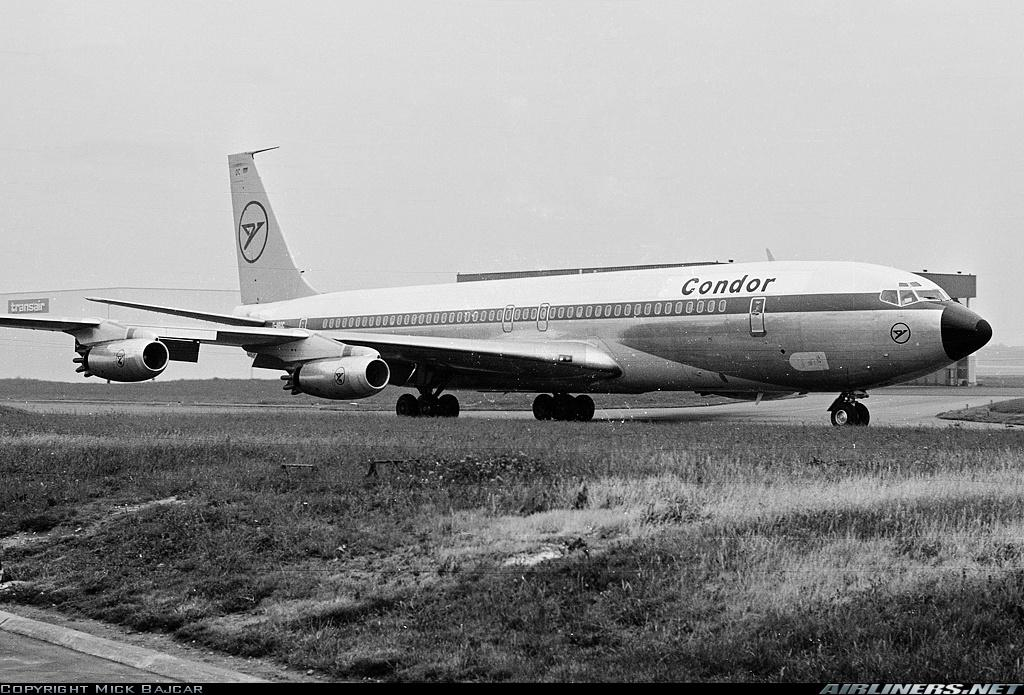

In [70]:
optimized_dir = f"data/optimized_dataset/{dataset_name}"

if not os.path.exists(os.path.join(optimized_dir, "index.json")):
    optimize_hf_to_lightning(hf_dataset, optimized_dir, image_key=image_key)

dataset = HFDataset(
        index_file = "index.json",
        root_dir=optimized_dir,
        lookup=classes if classes else None,
        # transform = transform
        )

dataloader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=4)
for _, texts, ahashes, phashes, uids in dataloader:
    print(texts, ahashes, phashes, uids)
    break
sample_uid = dataset.samples[0][0]
pil_image, text, ahash, phash = dataset.get_by_id(sample_uid)
pil_image.show()

# Load the laion400m dataset

In [71]:
"""load the laion400m dataset for image retrival"""
import os
from lightning_cloud.utils.data_connection import add_s3_connection
from lightning.data import StreamingDataset, StreamingDataLoader
from lightning.data.streaming.serializers import JPEGSerializer
import torchvision.transforms.v2 as T
from tqdm import tqdm
import imagehash
import torchvision.transforms as T
import matplotlib.pyplot as plt 
import numpy as np
import torch
import json
import concurrent
from PIL import Image
import io

# 1. Add the prepared dataset to your teamspace
add_s3_connection("laoin-400m")

# 2. Create the streaming dataset
class LAOINStreamingDataset(StreamingDataset):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.serializer = JPEGSerializer()

    def __getitem__(self, index):
        id, image, text, _, _, _ = super().__getitem__(index)
        
        return Image.open(io.BytesIO(image)), text, str(id)

laion = LAOINStreamingDataset(input_dir="/teamspace/s3_connections/laoin-400m")

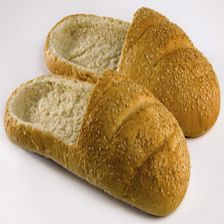

In [72]:
laion[69815173][0]

# Plot False-Positive Results

In [73]:
"""
plot original image and overlap images
one row per plot
"""
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import textwrap
import json
import imagehash

def resize_image(image, target_size=(256, 256)):
    return image.resize(target_size, Image.Resampling.LANCZOS)

def plot_results(uid, match_indices, output_dir, k=5):
    cols = k + 2

    fig, axes = plt.subplots(1, cols, figsize=(cols * 3, 3))
    axes[0].text(0.5, 0.5, uid, fontsize=24, ha='center', va='center')
    axes[0].axis("off")

    original_image, original_text, _, phash = dataset.get_by_id(uid)
    original_image_resized = resize_image(original_image)
    # original_caption = "original image\n" + "caption: " + original_text
    axes[1].imshow(original_image_resized)
    # wrapped_caption = "\n".join(textwrap.wrap(original_text, width=24))
    # axes[1].set_title(original_caption, fontsize=12)
    axes[1].axis('off')

    for j in range (k):
        ax = axes[j + 2]
        if j >= len(match_indices):
            ax.imshow(np.ones((1, 1, 3)))
        else:
            idx = match_indices[j]
            match_image, match_text, _ = laion[idx]
            laion_phash = imagehash.phash(match_image)
            dist = abs(imagehash.hex_to_hash(phash) - laion_phash)
            ax.imshow(match_image)
            # match_text = f"distance: {dist}\n" + match_text
            # wrapped_lines = textwrap.wrap(match_text, width=24)
            # wrapped_caption_match = "\n".join(wrapped_lines[:2])
            # ax.set_title(wrapped_caption_match, fontsize=12)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{dataset_name}-{uid}.png"))
    plt.close(fig)

In [74]:
# input_dir_raw = f"/teamspace/studios/find-overlaps-in-laion-400m/data/intermediate/{dataset_name}/match_indices_{threshold}"
input_dir_raw = f"/teamspace/studios/this_studio/data/intermediate/{dataset_name}/match_indices_{threshold}"
input_file_raw = os.path.join(input_dir_raw, "combined_results.json")

input_file_final = f"/teamspace/studios/this_studio/data/final/{dataset_name}/final_results.json"

output_dir = f"/teamspace/studios/this_studio/fp_figures/{dataset_name}"
os.makedirs(output_dir, exist_ok=True)

with open(input_file_raw, "r") as f:
    results_raw = json.load(f)
with open(input_file_final, "r") as f:
    results_final = json.load(f)

for uid, indices in tqdm(results_raw.items()):
    if uid not in results_final:
        plot_results(uid, indices, output_dir, k=5)
print("Plotted all images: ", output_dir)

100%|██████████| 155/155 [10:34<00:00,  4.09s/it]

Plotted all images:  /teamspace/studios/this_studio/fp_figures/aircraft-train
